In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 1. Xử lý dữ liệu lượng khách quốc tế (sum.csv)
foreign_tourist_df = pd.read_csv('sum.csv')
foreign_tourist_df = foreign_tourist_df[foreign_tourist_df['Tháng'] == 't12']
foreign_tourist_df['Tổng lượt khách cả năm'] = foreign_tourist_df['Tổng lượt khách cả năm'].str.replace('.', '').astype(int)

    # Lọc dữ liệu năm 2024 và tính tổng 11 tháng
foreign_tourist_2024 = pd.read_csv('sum.csv')
foreign_tourist_2024 = foreign_tourist_2024[foreign_tourist_2024['Năm'] == 2024]
foreign_tourist_2024['Ước tính mỗi tháng'] = foreign_tourist_2024['Ước tính mỗi tháng'].str.replace('.', '').astype(int)

    # Tính trung bình của 11 tháng và ước tính tháng 12
trung_binh_11_thang = foreign_tourist_2024['Ước tính mỗi tháng'].mean()
du_bao_t12 = trung_binh_11_thang
tong_11_thang = foreign_tourist_2024[foreign_tourist_2024['Tháng'] == 't11']['Tổng lượt khách cả năm'].str.replace('.', '').astype(int).values[0]

# Thêm giá trị dự báo cho năm 2024 vào dataframe
du_bao_2024 = pd.DataFrame({
    'Năm': [2024],
    'Tháng': ['t12'],
    'Tổng lượt khách cả năm': [int(tong_11_thang + du_bao_t12)]
})

foreign_tourist_df = pd.concat([foreign_tourist_df, du_bao_2024], ignore_index=True)
foreign_tourist_grouped = foreign_tourist_df.groupby('Năm')['Tổng lượt khách cả năm'].sum().reset_index()

# 2. Xử lý dữ liệu lạm phát (inflation_rate.csv)
# Kiểm tra và loại bỏ các giá trị null trước khi tách cột
inflation_df = pd.read_csv('inflation_rate.csv')
inflation_df = inflation_df.dropna(subset=['Date'])

# Chuyển đổi cột Date sang dạng datetime và tách thành Year và Month
inflation_df['Date'] = pd.to_datetime(inflation_df['Date'], format='%b %Y')
inflation_df['Year'] = inflation_df['Date'].dt.year
inflation_df['Month'] = inflation_df['Date'].dt.month

inflation_df['Inflation Rate'] = inflation_df['Inflation Rate'].astype(str).str.replace('%', '').astype(float)

inflation_avg = inflation_df.groupby('Year')['Inflation Rate'].mean().reset_index()
inflation_avg = inflation_avg[(inflation_avg['Year'] >= 2019) & (inflation_avg['Year'] <= 2024)]

gdp_df = pd.read_csv('gdp_20192024.csv')
total_revenue_df = pd.read_csv('total_revenue.csv')

In [12]:
foreign_tourist_grouped

,Năm,Tổng lượt khách cả năm
0,2019,18008591
1,2020,3686779
2,2021,3500
3,2022,3661222
4,2023,12602434
5,2024,17263523


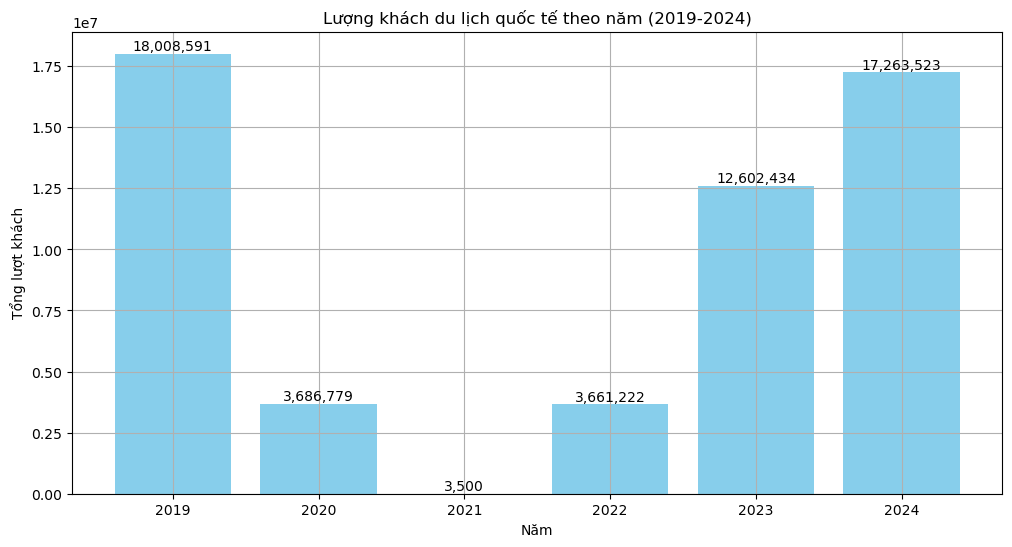

In [15]:
plt.figure(figsize=(12, 6))
bars = plt.bar(foreign_tourist_grouped['Năm'], foreign_tourist_grouped['Tổng lượt khách cả năm'], color='skyblue')
plt.title('Lượng khách du lịch quốc tế theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('Tổng lượt khách')
plt.grid(True)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', ha='center', va='bottom')


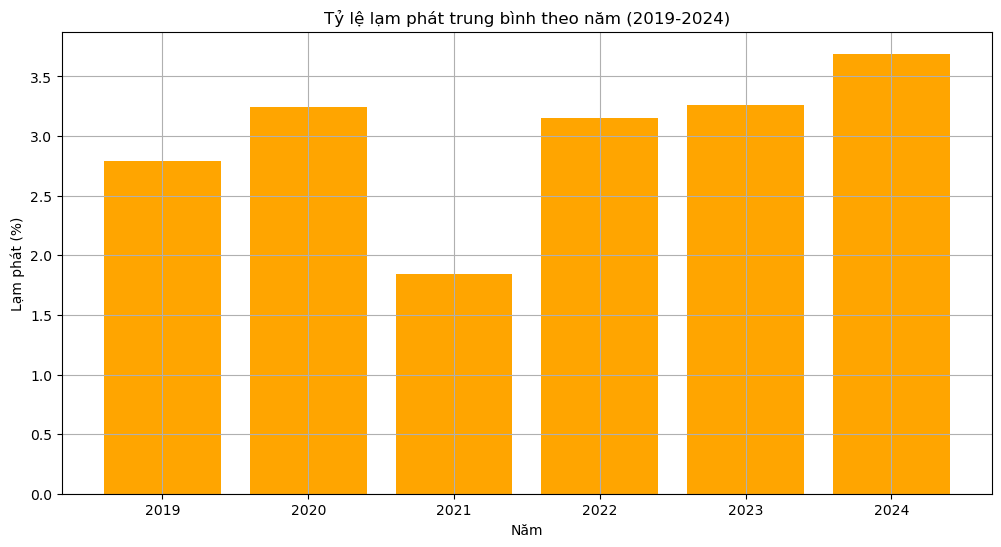

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(inflation_avg['Year'], inflation_avg['Inflation Rate'], color='orange')
plt.title('Tỷ lệ lạm phát trung bình theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('Lạm phát (%)')
#plt.savefig('inflation_rate.png')
plt.grid(True)

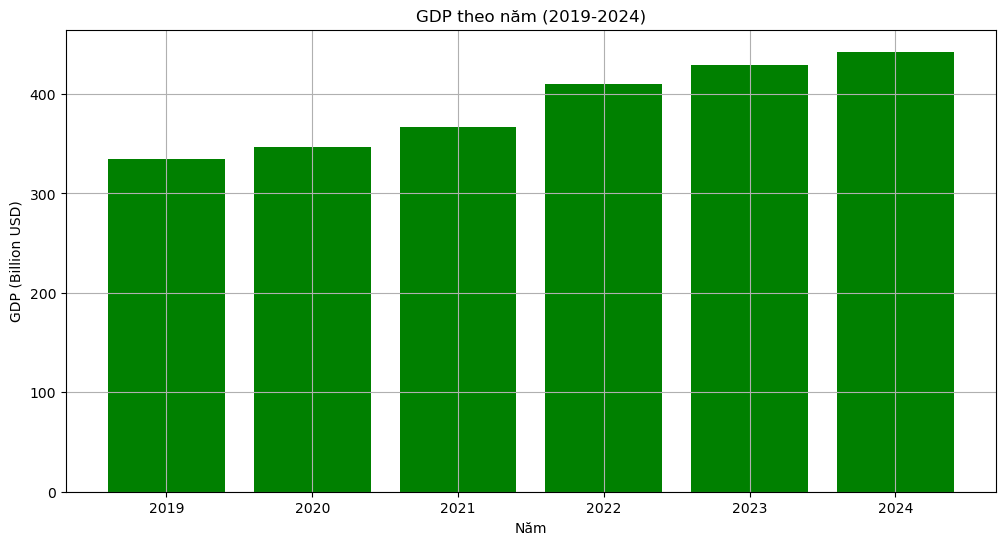

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(gdp_df['Year'], gdp_df['GDP (Billion USD)'], color='green')
plt.title('GDP theo năm (2019-2024)')
plt.xlabel('Năm')
plt.ylabel('GDP (Billion USD)')
#plt.savefig('gdp_20192024.png')
plt.grid(True)

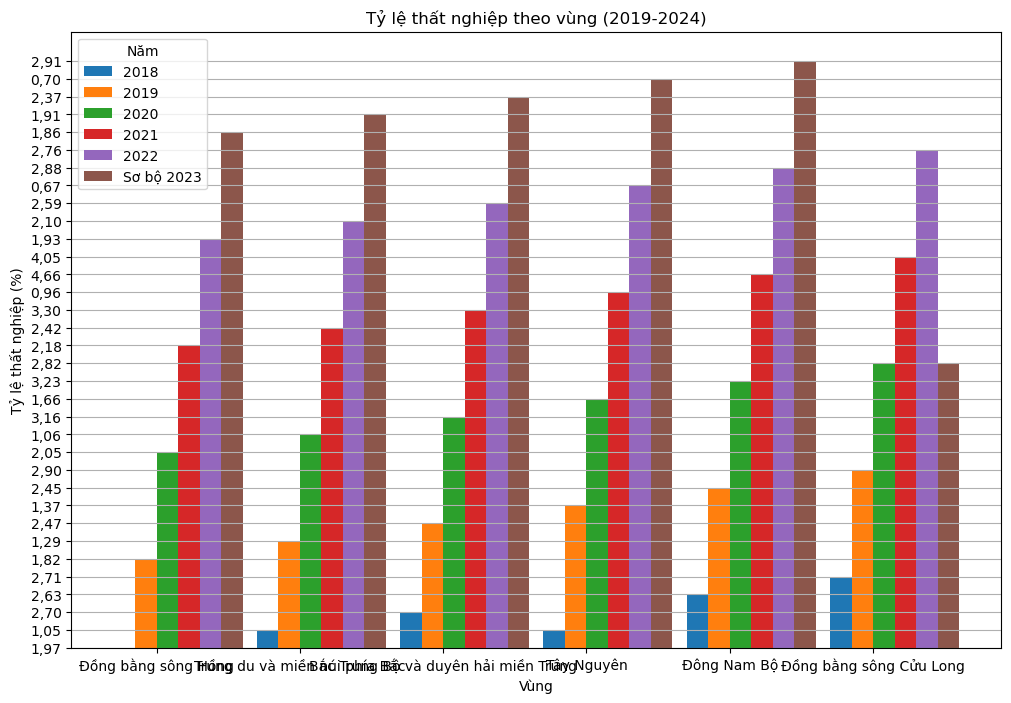

In [18]:
# Đọc dữ liệu thất nghiệp (unemployment.csv)
unemployment_df = pd.read_csv('unemployment.csv')

# Lọc dữ liệu từ 2019 đến 2024
region_rows = [1, 13, 28, 43, 49, 56]  # Các dòng chứa dữ liệu vùng
unemployment_df = unemployment_df.iloc[region_rows, :]
unemployment_df.reset_index(drop=True, inplace=True)


plt.figure(figsize=(12, 8))
bar_width = 0.15
x = range(len(unemployment_df['Tỉnh/Thành phố']))

for i, year in enumerate(unemployment_df.columns[1:]):
    plt.bar([p + i * bar_width for p in x], unemployment_df[year], width=bar_width, label=year)

plt.xticks([p + 1.5 * bar_width for p in x], unemployment_df['Tỉnh/Thành phố'])
plt.title('Tỷ lệ thất nghiệp theo vùng (2019-2024)')
plt.xlabel('Vùng')
plt.ylabel('Tỷ lệ thất nghiệp (%)')
plt.legend(title='Năm')
#plt.savefig('unemployment_df.png')
plt.grid(axis='y')

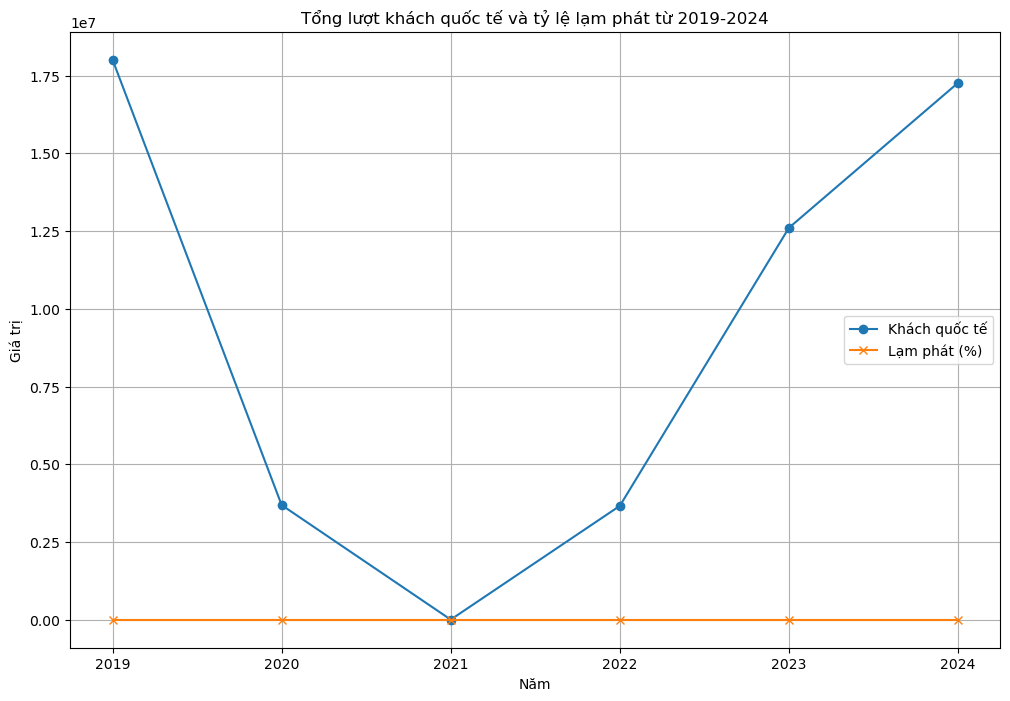

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(foreign_tourist_grouped['Năm'], foreign_tourist_grouped['Tổng lượt khách cả năm'], label='Khách quốc tế', marker='o')
plt.plot(inflation_avg['Year'], inflation_avg['Inflation Rate'], label='Lạm phát (%)', marker='x')
plt.title('Tổng lượt khách quốc tế và tỷ lệ lạm phát từ 2019-2024')
plt.xlabel('Năm')
plt.ylabel('Giá trị')
plt.legend()
plt.grid(True)